### Assignment 2 FIT1043
- Student Name: Anisha Shrestha
- Student ID: 29389356
- Tutorial Code:01-p1
- Tutor: Heshan and Vijaya

In [272]:
#Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [273]:
#importing dataset 
city_p = pd.read_csv('CityPairs.csv')
city_p.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [274]:
city_p.describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,72972.000000,72972.000000,72972.00000,72972.000000,72972.000000,72972.000000,72972.000000,72972.000000,72972.000000,72972.000000,72972.000000,72972.000000
mean,36417.555405,3780.382791,139.45810,6.938752,3725.242847,124.145430,4.265560,7505.625637,263.603530,11.204312,1999.247054,6.483172
std,3106.561578,7362.506500,346.96702,23.385646,7263.097518,324.311081,13.770793,14556.616468,634.173976,33.716790,8.507930,3.464992
min,31048.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,33939.000000,89.000000,0.00000,0.000000,92.000000,0.000000,0.000000,201.000000,0.258000,0.000000,1992.000000,3.000000
50%,36220.000000,979.000000,9.09750,0.000000,957.000000,9.961500,0.000000,1961.000000,28.682000,0.112000,1999.000000,6.000000
75%,38838.000000,3898.000000,102.37600,1.321250,3759.000000,90.948500,1.451250,7684.250000,211.404250,4.065250,2006.000000,10.000000
max,42491.000000,83898.000000,4052.41000,393.705000,83168.000000,4996.582000,382.229000,162036.000000,7198.998000,566.993000,2016.000000,12.000000


# Part A - Analysing Mail Flow in Australian Capital Cities

Create a bar chart which shows the total Mail_In and total Mail_Out for each of the ports

In [275]:
city_p.AustralianPort.unique()

array(['Adelaide', 'Brisbane', 'Cairns', 'Darwin', 'Hobart', 'Melbourne',
       'Norfolk Island', 'Perth', 'Port Hedland', 'Sydney', 'Townsville',
       'Christmas Island', 'Broome', 'Gold Coast/Coolangatta',
       'Newcastle', 'Canberra', 'Gold Coast', 'Sunshine Coast'],
      dtype=object)

In [276]:
#creating a subset where Austalian  ports are Adelaide, Brisbane, Darwin, Hobart, Melbourne, Perth, and Sydney
sub_ACP = city_p[(city_p.AustralianPort =='Adelaide') |
                 (city_p.AustralianPort =='Brisbane') |(city_p.AustralianPort=='Darwin')|
                (city_p.AustralianPort=='Hobart') |
                 (city_p.AustralianPort=='Melbourne') 
                 |(city_p.AustralianPort=='Perth')|
                    (city_p.AustralianPort=='Sydney')]
sub_ACP.AustralianPort.unique()

array(['Adelaide', 'Brisbane', 'Darwin', 'Hobart', 'Melbourne', 'Perth',
       'Sydney'], dtype=object)

In [277]:
ACP_mail_sum=sub_ACP.groupby('AustralianPort').agg({'Mail_In_(tonnes)':'sum','Mail_Out_(tonnes)':'sum'})
#min date for each country

# #flattening the groupby output
ACP_mail_sum = ACP_mail_sum.reset_index()

ACP_mail_sum=ACP_mail_sum.round(2)
ACP_mail_sum

,AustralianPort,Mail_In_(tonnes),Mail_Out_(tonnes)
0,Adelaide,3151.79,3577.53
1,Brisbane,38971.90,37698.23
2,Darwin,401.67,589.19
3,Hobart,5.68,0.29
4,Melbourne,128609.33,70646.59
5,Perth,20788.44,17177.82
6,Sydney,312534.16,177177.97


https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

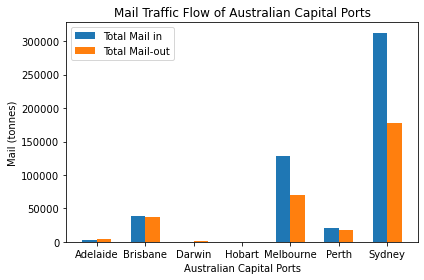

In [278]:
x_axis = np.arange(len(ACP_mail_sum.AustralianPort))  

width = 0.3

fig, ax = plt.subplots()
rect1 = ax.bar((x_axis - width/2) , 
               ACP_mail_sum['Mail_In_(tonnes)'],
               width, label='Total Mail in')
rect2 = ax.bar((x_axis + width/2),  
               ACP_mail_sum['Mail_Out_(tonnes)'],
               width,label='Total Mail-out')

# Adding labels
ax.set_ylabel('Mail (tonnes)')
ax.set_xlabel('Australian Capital Ports')
ax.set_title('Mail Traffic Flow of Australian Capital Ports')
ax.set_xticks(x_axis)
ax.set_xticklabels(ACP_mail_sum.AustralianPort)
ax.legend()

fig.tight_layout()

plt.show()


#### 1.1. Which city has the largest amount of mail flowing in?

The city with the largest amount of mail flowing in is Sydney. 

#### 1.2. Can you properly compare the values for all cities by looking at the plot? Why?
 
 No, it's difficult to compare values of Darwin and Hobart. Since the total mail-in and out of extreamly small compared to the rest of the ports it is not visible in the chosen y-axis scale. Therefore, it's imposible to compare whether the total number of mail -in is greater or mail-out for Hobart and if the total mail-in for Darwin is greater than the total mail-in of Hobart, vise versa.   

#### 1.3. Why do you think the mail traffic amount is significantly higher for some of the ports?

https://blog.id.com.au/2016/population/population-trends/latest-population-figures-top-50-largest-cities-and-towns-in-australia/
https://www.profitableventure.com/cities-australia-start-business/

The mail traffic amount are significantly higher for some of the ports, because of the higher population in those Australian capital ports. Since Sydney and Melbourne have higher population than the other cities shown in the graph, its likely that there are higher rates of mail exchange happening in those states. Sydney and Melbourne also have higher number of immigrants and international students studying in these cities which can be another reason for the high mail traffic in thoses Capitals due to them exchanging mails to their home countries.  Moreover Sydeny is known to be leading city in Australia as as fintech hub comprising of largest economic sectors of Australia followed by Melbourne, therefore being an commercial hub the mail traffic amount must be significantly higher in those cities. 

2. Create a line chart to show the trend of total mail traffic to each of the following ports against year: Perth and Brisbane.

In [279]:
perth = city_p[city_p.AustralianPort=='Perth']
perth_mail_t = perth.groupby('Year').agg({'Mail_Total_(tonnes)':'sum'})

#flattening the groupby output
perth_mail_t = perth_mail_t.reset_index()
perth_mail_t=perth_mail_t.round(2)
perth_mail_t.head()


,Year,Mail_Total_(tonnes)
0,1985,171.46
1,1986,224.05
2,1987,277.87
3,1988,545.53
4,1989,790.57


In [280]:
brisbane = city_p[city_p.AustralianPort=='Brisbane']
brisbane_mail_t = brisbane.groupby('Year').agg({'Mail_Total_(tonnes)':'sum'})

#flattening the groupby output
brisbane_mail_t = brisbane_mail_t.reset_index()
brisbane_mail_t=brisbane_mail_t.round(2)
brisbane_mail_t.head()

,Year,Mail_Total_(tonnes)
0,1985,232.59
1,1986,303.25
2,1987,402.03
3,1988,756.03
4,1989,1052.27


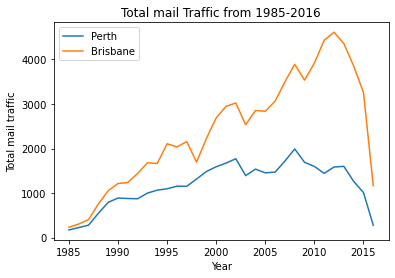

In [281]:
plt.plot(perth_mail_t.Year,
         perth_mail_t['Mail_Total_(tonnes)'],
         label='Perth')
plt.plot(brisbane_mail_t.Year,
         brisbane_mail_t['Mail_Total_(tonnes)'], 
         label='Brisbane')
plt.legend(loc="upper left")
plt.title('Total mail Traffic from 1985-2016')
plt.xlabel('Year')
plt.ylabel('Total mail traffic')
plt.show() 

####  2.1. How was the mail package traffic to each of the Brisbane and Perth ports in the mid-80s?

The mail package traffic in  Brisbane and Perth ports in the mid-80s were less than 500 tonnes. From the graph we can depict that Brisbane had a higher total mail traffic than Perth during that time period.  The total mail traffic were steadily increasing for both ports at similar rate in the mid-80s.


#### 2.2. How was the total mail traffic to Brisbane and Perth in 2016? (You should analyse the data and see if 2016 has anything different from the previous years or not. Make sure to use the output of the function “describe()” of Pandas dataframe to answer this question).

From the graph we see that the total mail traffic in 2016 for Brisbane and Perth drastically dropped. In 2015 the total mail traffic for Brisbane was greater than 3000 tonnes while in 2016 it dropped at an accelerating rate to around 1000 tonnes. Similarly, for Perth in 2016, the total mail traffic dropped from around 1000 tonnes in 2015 to approximately what it was during 1980s which is less than 500 tonnes.

After inspecting the describe() function for the year 2016 against other years for both Brisbane and Perth, By analysing the Month_num column in the dataset, I found that there are only records till the 5th month for 2016 while for all other years the data is present for all 12 months. Since the data of the rest of the months are not presented in the data frame the trend of total mail traffic shown in the graph for the year 2016 is not accurate/complete. Thus, due to the lack of data for 2016 the graph displays the drastic decrease in the total mail traffic when that most likely might not be the case


Data exploration through describe() for various years for Brisbane and Perth: 

In [282]:
brisbane[brisbane.Year==2016].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.0,132.000000
mean,42429.916667,8318.371212,143.516886,4.829947,8017.053030,216.838841,3.986379,16335.424242,360.355727,8.816326,2016.0,2.977273
std,42.948405,9662.015628,246.295542,10.895528,9244.199491,379.939586,8.113510,18844.672995,614.337651,16.570239,0.0,1.422104
min,42370.000000,228.000000,0.000000,0.000000,271.000000,0.000000,0.000000,529.000000,0.000000,0.000000,2016.0,1.000000
25%,42401.000000,1663.000000,0.995250,0.000000,1694.500000,7.367750,0.000000,3465.250000,11.847500,0.000000,2016.0,2.000000
50%,42430.000000,6245.000000,31.646500,0.000000,5791.000000,64.983500,0.000000,11856.500000,91.858000,0.104000,2016.0,3.000000
75%,42461.000000,9901.250000,140.034000,5.068000,9229.250000,284.332000,1.203750,19372.250000,383.407750,11.690500,2016.0,4.000000
max,42491.000000,47218.000000,1124.250000,59.561000,44045.000000,2098.366000,33.997000,91263.000000,3124.156000,69.406000,2016.0,5.000000


In [283]:
brisbane[brisbane.Year==2015].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.0,315.000000
mean,42170.774603,8326.796825,174.601457,6.321432,8303.431746,216.957400,4.030003,16630.228571,391.558857,10.351435,2015.0,6.476190
std,105.301947,9641.243496,296.773372,11.906381,9638.657372,367.107298,9.330444,19203.668869,653.903211,19.076498,0.0,3.461605
min,42005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0,1.000000
25%,42064.000000,1895.500000,1.244000,0.000000,2020.500000,11.319500,0.000000,3975.500000,17.413000,0.000000,2015.0,3.000000
50%,42156.000000,5524.000000,39.482000,0.000000,5505.000000,64.115000,0.000000,11329.000000,105.198000,0.170000,2015.0,6.000000
75%,42248.000000,9164.000000,198.485000,7.639500,9088.500000,293.392000,0.968000,18152.500000,486.319000,13.240500,2015.0,9.000000
max,42339.000000,44856.000000,1455.151000,58.549000,47951.000000,2188.911000,75.332000,89509.000000,3553.376000,133.066000,2015.0,12.000000


In [284]:
brisbane[brisbane.Year==2013].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.0,330.000000
mean,41438.924242,7190.660606,161.059791,10.014115,6958.251515,160.381255,3.195279,14148.912121,321.441045,13.209394,2013.0,6.415152
std,105.981978,8856.805949,277.007856,17.718396,8733.316501,297.497897,7.720459,17490.102145,557.677407,22.406863,0.0,3.484278
min,41275.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161.000000,0.000000,0.000000,2013.0,1.000000
25%,41334.000000,2044.250000,0.194750,0.000000,1686.250000,0.350500,0.000000,3958.000000,6.742750,0.000000,2013.0,3.000000
50%,41426.000000,4238.500000,29.433500,0.013500,3958.500000,31.256500,0.000000,7707.000000,69.410500,0.358500,2013.0,6.000000
75%,41518.000000,8116.750000,186.091000,14.810750,8320.250000,172.016750,0.952000,16319.750000,452.936250,19.382000,2013.0,9.000000
max,41609.000000,40676.000000,1369.845000,99.392000,42785.000000,1944.803000,56.688000,81426.000000,3062.712000,129.579000,2013.0,12.000000


In [285]:
brisbane[brisbane.Year==2011].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.0,377.000000
mean,40710.618037,5921.339523,142.434419,8.970403,5868.758621,126.284377,2.788525,11790.098143,268.718796,11.758928,2011.0,6.503979
std,104.800482,7870.675316,267.893376,22.732476,7814.381890,268.123928,8.022462,15609.205112,523.606757,27.620502,0.0,3.445720
min,40544.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.0,1.000000
25%,40634.000000,1134.000000,0.014000,0.000000,875.000000,0.015000,0.000000,2331.000000,0.499000,0.000000,2011.0,4.000000
50%,40725.000000,2882.000000,29.368000,0.000000,2816.000000,21.004000,0.000000,5561.000000,61.872000,0.013000,2011.0,7.000000
75%,40787.000000,7567.000000,125.642000,0.899000,7856.000000,113.111000,0.512000,15306.000000,256.610000,2.451000,2011.0,9.000000
max,40878.000000,39868.000000,1459.923000,134.797000,42792.000000,1858.124000,60.249000,77800.000000,3094.317000,154.961000,2011.0,12.000000


In [286]:
perth[perth.Year ==2016].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000
mean,42429.448718,11716.987179,187.982295,2.868936,11008.692308,317.148500,0.685744,22725.679487,505.130795,3.554679,2016.0,2.961538
std,42.558332,13845.671339,228.121084,5.482965,12524.209862,458.224219,1.349018,26234.656381,674.825106,6.372295,0.0,1.409083
min,42370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000
25%,42401.000000,2212.250000,21.695250,0.000000,2180.000000,12.216000,0.000000,4344.000000,40.745250,0.000000,2016.0,2.000000
50%,42430.000000,6247.000000,78.488000,0.131000,6389.500000,135.597500,0.000000,12724.500000,261.068500,0.318000,2016.0,3.000000
75%,42461.000000,12958.000000,303.067250,4.171250,13219.500000,463.418000,0.270250,28682.000000,678.263500,4.431250,2016.0,4.000000
max,42491.000000,58548.000000,930.906000,27.538000,48660.000000,1865.524000,5.479000,107208.000000,2642.006000,27.538000,2016.0,5.000000


In [287]:
perth[perth.Year ==2015].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.0,193.000000
mean,42169.362694,10967.544041,219.233907,4.317026,10756.979275,270.804539,0.922223,21724.523316,490.038446,5.239249,2015.0,6.430052
std,104.586353,13013.034463,278.863015,9.473052,12712.421749,389.045424,4.464096,25554.937813,656.632938,11.330594,0.0,3.437921
min,42005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0,1.000000
25%,42095.000000,2302.000000,20.054000,0.000000,2306.000000,9.608000,0.000000,4588.000000,36.835000,0.000000,2015.0,4.000000
50%,42156.000000,5935.000000,75.365000,0.059000,5707.000000,126.690000,0.000000,11515.000000,224.874000,0.063000,2015.0,6.000000
75%,42248.000000,10985.000000,350.758000,3.825000,11279.000000,316.876000,0.000000,20766.000000,701.938000,5.701000,2015.0,9.000000
max,42339.000000,56975.000000,1255.255000,51.093000,58567.000000,1676.893000,54.851000,104077.000000,2731.511000,76.171000,2015.0,12.000000


In [288]:
perth[perth.Year ==2013].describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.0,182.000000
mean,41445.362637,10885.917582,233.653995,7.296681,10651.664835,216.653242,1.493198,21537.582418,450.307236,8.789879,2013.0,6.626374
std,106.657143,12913.747785,296.342713,13.185025,12804.244184,332.192860,5.690041,25514.721539,613.404856,16.433029,0.0,3.505791
min,41275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0,1.000000
25%,41365.000000,2150.000000,6.595000,0.000000,2103.250000,0.506000,0.000000,4256.000000,8.897750,0.000000,2013.0,4.000000
50%,41456.000000,5385.000000,61.641500,0.001500,5479.000000,92.567000,0.000000,11058.500000,262.176000,0.066000,2013.0,7.000000
75%,41548.000000,15992.250000,367.982500,6.343000,14996.750000,249.725000,0.010750,34423.500000,641.885000,9.591000,2013.0,10.000000
max,41609.000000,56899.000000,1199.523000,59.130000,63530.000000,1495.582000,41.762000,107817.000000,2532.043000,80.842000,2013.0,12.000000


### Part B1 - Linear Regression and Prediction

Create a scatter plot in Python showing the total annual freight in tonnes at all Australian
state capital ports against the year.


In [289]:
# creating a sub data frame 
sub_ACP_tf = sub_ACP.groupby('Year').agg({'Freight_Total_(tonnes)':'sum'})

#flattening the groupby output
sub_ACP_tf = sub_ACP_tf.reset_index()
sub_ACP_tf = sub_ACP_tf.round(2)
sub_ACP_tf.head()

,Year,Freight_Total_(tonnes)
0,1985,230272.05
1,1986,247340.71
2,1987,286028.18
3,1988,306648.32
4,1989,345092.75


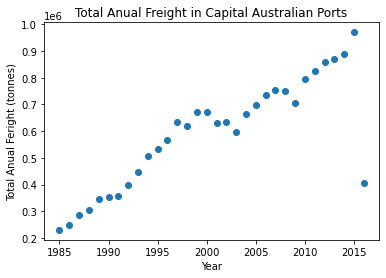

In [290]:
#creating a scater plot 
plt.scatter(sub_ACP_tf.Year, 
            sub_ACP_tf['Freight_Total_(tonnes)'])

plt.title('Total Anual Freight in Capital Australian Ports')
plt.xlabel('Year')
plt.ylabel('Total Anual Feright (tonnes)')
plt.show() 


#### 1. Does the data show a clear pattern? Describe the relationship you observe.

The above graph does display a general pattern, we can see that as the Year increases the Total Anual Feright also increases. Therefore we see a positive linear relationship between total anual frieght and year. 

#### 2. Are there any outliers? If so, use the IQR rule to remove the outliers. IQR rule is a simple method which can help you to detect the outliers based on the output of function “describe()”.

In [291]:
sub_ACP_tf['Freight_Total_(tonnes)'].describe()

count        32.000000
mean     592518.790625
std      204506.840452
min      230272.050000
25%      403832.120000
50%      632138.235000
75%      739975.605000
max      970265.750000
Name: Freight_Total_(tonnes), dtype: float64

Using the describe() method we can get the values of Q1 and Q3 to calculate the inter quartile range (IQR) which can be used to detect the outliners. The following code uses the percentile method of the numpy library to calculate the 3rd (75) and the 1st(25) quartiles. 

In [292]:
#calculating IQR 
Q1 = np.percentile(sub_ACP_tf['Freight_Total_(tonnes)'], 25)
Q3= np.percentile(sub_ACP_tf['Freight_Total_(tonnes)'], 75)
IQR = Q3-Q1 
print('The value of the interquartile range IQR is ' + str(IQR))  

The value of the interquartile range IQR is 336143.485


Now, Finding the boudaries above and beyond 1.5 * IQR 

In [293]:
lower_boundary= Q1 - (1.5*IQR)
upper_boundary = Q3+ (1.5*IQR)
print('The lower and upper boundary are ' + str(lower_boundary.round(2))+ 
      ' and ' + str(upper_boundary.round(2)) + ' respectively.') 

The lower and upper boundary are -100383.11 and 1244190.83 respectively.


Looking  at the min (i.e. 230272.05) and max (i.e. 970265.75) values from the describe() table we can see that there are no values that lie beyond the boundary region therefore, there are no outliers according to the IQR rule. 

#### 3. Create a simple linear regression to model the relationship between Year and the Total Freight. Does the linear fit look to be a good fit? Justify your answer.



In [294]:
from scipy.stats import linregress

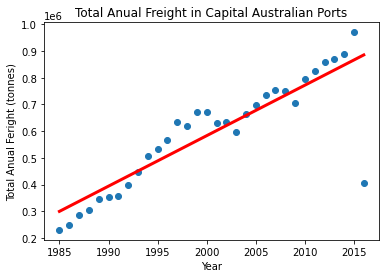

In [295]:
#creating a linear regression model 
slope, intercept, r_value, p_value, std_err =linregress(sub_ACP_tf.Year,
                                                        sub_ACP_tf['Freight_Total_(tonnes)'])

line = [slope*xi + intercept for xi in sub_ACP_tf.Year]

#ploting the line 
plt.plot(sub_ACP_tf.Year,line,'r-', linewidth=3)

plt.scatter(sub_ACP_tf.Year, sub_ACP_tf['Freight_Total_(tonnes)'])

plt.title('Total Anual Freight in Capital Australian Ports')
plt.xlabel('Year')
plt.ylabel('Total Anual Feright (tonnes)')


plt.show()

In [296]:
# checking the performance of the model 
r_value.round(4)

0.8667

In [297]:
p_value # standard error

1.4324411983119463e-10

The r-value suggests that the model explains 86.6% of variations in the data , which suggests that the line is a good representation of the dataset. Likewise, the p-value i.e. 1.43 e-10 is extremely low which suggests that the model fits the dataset very well. Therefore, the linear fit is a good fit.


#### 4. How fast is the total amount of freight increasing each year? [Hint: Think about what parameter in the regression model represents the rate of change]




In [298]:
slope.round(2)

18894.49

The slope represent the rate of increase of freight, therefore, the freight is increasing by 18894.49 tonnes each year. 

#### 5. What does the linear model predict for the total freight volume at Australian state capital ports in 2020?

By inserting the values to the formula y=mx+ c we can predict the total freight volume at Australian state capital ports in 2020. 
The variables and values are as follows 

- y= total freight volume 
- m= slope 
- x= 2020
- c= y-intercept

In [299]:
total_fv = slope*2020 + intercept
total_fv.round(2)

960961.39

According to the linear model the total freight volume at Australian state capital ports in 2020 is 960961.39.

#### 6. Try fitting the linear model only to the data from the year 2005 onwards. What happens to the prediction for 2020? Which prediction could you trust more? Why?

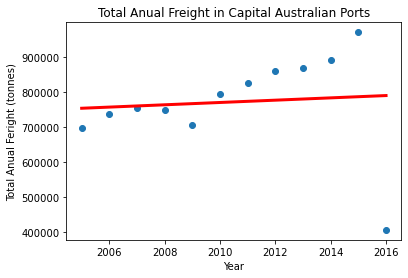

In [300]:
#creating a subset with data from 2005 
sub_ACP_tf = sub_ACP_tf[sub_ACP_tf.Year>=2005]
#creating a linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(sub_ACP_tf.Year,
                                            sub_ACP_tf['Freight_Total_(tonnes)'])


line = [slope*xi + intercept for xi in sub_ACP_tf.Year]

#ploting the line
plt.plot(sub_ACP_tf.Year,line,'r-', linewidth=3)


plt.scatter(sub_ACP_tf.Year, sub_ACP_tf['Freight_Total_(tonnes)'])

plt.title('Total Anual Freight in Capital Australian Ports')
plt.xlabel('Year')
plt.ylabel('Total Anual Feright (tonnes)')


plt.show()

In [301]:
total_fv= slope*2020 + intercept
total_fv.round(2)

802553.15

According to the linear model  from the year 2005 onwards the total freight volume at Australian state capital ports in 2020 is 802553.15.
The total fireight volume predicted for 2020 is lower than the previous model. 

In [302]:
r_value.round(4)

0.0841

In [303]:
p_value.round(3)

0.795

For the model fitted to the data from 2005 onwards we can see that the r value is 0.084 which is very low. This suggests that the model only explains 8.4% of variations in the dataset. Likewise, the p value is 0.795 for this model which is high and suggests that the changes in the predictor are not associated with the changes in the response, therefore it is not a good fit to the dataset. Thus, I would trust the first prediction made in q5 i.e. 960961.39 than the prediction from the above model.

### Part B2 - Comparing Traffic Volumes
We explore the distribution of total monthly passenger traffic at *all of the Australian* ports in
this question.
#### 1. You first need to calculate the total number of Passengers_In and the total number of Passengers_Out for each unique month over the years for all the Australian ports. (i.e consider each month of each year as a unique month to calculate the total number of passengers. You can make use of the column “Month” for this). .


In [304]:
#grouping data by Month- Year 
sub_AP_mtv = city_p.groupby('Month').agg({'Passengers_In':'sum','Passengers_Out':'sum'})
#flattening the groupby output
sub_AP_mtv = sub_AP_mtv.reset_index()
sub_AP_mtv.head()

,Month,Passengers_In,Passengers_Out
0,31048,263795,208770
1,31079,204953,179222
2,31107,209513,231582
3,31138,182673,214403
4,31168,198902,224350


#### Next, create histograms to check the distribution of monthly Passengers_In and monthly Passengers_Out. Describe the distributions. Can you see any outliers in the plots? Discuss your answer

https://datatofish.com/plot-histogram-python/

For the histograms, I used the trial and error method to determine the appropriate number of bins. I chose the number that detailed the important pattern of the dataset while not making the data pattern look rough.  

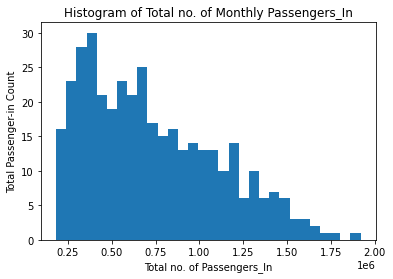

In [305]:

n, bins, patches= plt.hist(sub_AP_mtv['Passengers_In'],  bins=30, label="Data")
plt.ylabel('Total Passenger-in Count')
plt.xlabel('Total no. of Passengers_In')
plt.title("Histogram of Total no. of Monthly Passengers_In")
plt.show()


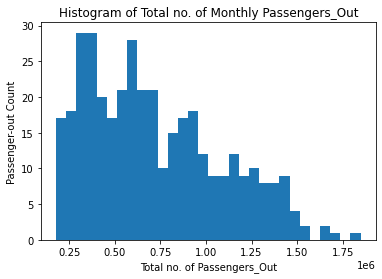

In [306]:
#choosing 30 as number of bins. 
n, bins, patches= plt.hist(sub_AP_mtv['Passengers_Out'],  bins=30,label="Data")
plt.ylabel('Passenger-out Count')
plt.xlabel('Total no. of Passengers_Out')
plt.title("Histogram of Total no. of Monthly Passengers_Out")
plt.show()

https://bolt.mph.ufl.edu/6050-6052/unit-1/one-quantitative-variable-introduction/describing-distributions/#shape

Both passenger_out and passenger_in histograms are positively skewed as we can see a longer right tail suggesting that majority of the unique month observations are concentrated towards the low to medium total no. of passengers and small number of observations with high total no. of passengers. 

Passenger-in and passenger-out graphs have its peak with the count 30 and approximately 30 respectively in between 250000 and 500000 number of total passengers inbounds. However, for passenger_out we can see a distinguishable second and a third peak suggesting there are cluster of month-year where about 500000-750000 and 750000-1000000 respective number of passengers out bounded from Australia.

In histograms outliers are the observations that lie separately from the overall pattern. For Monthly passenger_in graph there is one probable outlier on the right which has the value of about 1850000 total number of passengers inbound. 
While in Passenger_out histogram we see two probable outliers around 1700000 and one which is about 1800000 total number of passengers.



#### 2. Use boxplots to visualise the information of question 1.1. How many outliers can you see in the plots? Use the IQR rule to show the data points which are considered as outliers of monthly Passengers_In and monthly Passengers_Out)



Text(0.5, 1.0, 'Boxplot of Total no. of Monthly Passengers In and Out')

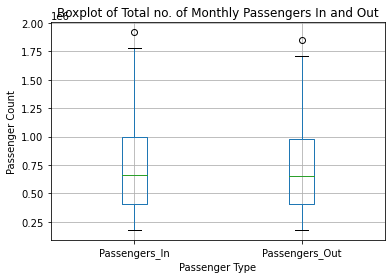

In [307]:
boxplot = sub_AP_mtv.boxplot(column=['Passengers_In','Passengers_Out'])

plt.ylabel('Passenger Count')
plt.xlabel('Passenger Type')
plt.title("Boxplot of Total no. of Monthly Passengers In and Out")

From the boxplot we can see that the Passenger_In and Passenger_Out each have one outliner. The following codes determine the datapoints that are considered to be outliers of the monthly Passenger_in and monthly Passengers_Out.

#### For monthly Passenger_in: 

In [308]:
#finding the vlaue of the interquartile range
Q1 = np.percentile(sub_AP_mtv['Passengers_In'], 25)
Q3= np.percentile(sub_AP_mtv['Passengers_In'], 75)
IQR = Q3-Q1
IQR 

586532.0

In [309]:
lower_boundary = Q1- (1.5*IQR) 
lower_boundary

-471864.0

Looking at the boxpolt we see that there are no outliners as non of the observations are less than the lower boundary.

In [310]:
upper_boundary = Q3 + (1.5*IQR)
upper_boundary

1874264.0

In [311]:
pass_in_outliers = sub_AP_mtv[sub_AP_mtv['Passengers_In']> upper_boundary]
pass_in_outliers

,Month,Passengers_In,Passengers_Out
372,42370,1918279,1642059


The above row is the datapoint considered to be the outliner for monthly Passenger_in according to the IQR rule 

#### For monthly Passenger_out:

In [312]:
Q1 = np.percentile(sub_AP_mtv['Passengers_Out'], 25)
Q3= np.percentile(sub_AP_mtv['Passengers_Out'], 75)
IQR = Q3-Q1
IQR 

572214.0

In [313]:
lower_boundary = Q1- (1.5*IQR) 
lower_boundary

-454615.0

Likewise, for passenger_out as well we see that there are no outlier in the lower end. 

In [314]:
upper_boundary = Q3 + (1.5*IQR)
upper_boundary

1834241.0

In [315]:
pass_out_outliers = sub_AP_mtv[sub_AP_mtv['Passengers_Out']> upper_boundary]
pass_out_outliers

,Month,Passengers_In,Passengers_Out
371,42339,1580055,1847744


The above row is the datapoint considered to be the outliner for monthly Passenger_out according to the IQR rule. 


#### 3. As you can see in question 1.2, the information which is provided by a boxplot is so similar to the information which we saw in the output of the function “describe()”. However, they are not the same. What are the differences between the information which are shown in a box plot and the output of function “describe()”?

In [316]:
sub_AP_mtv.describe()

,Month,Passengers_In,Passengers_Out
count,377.000000,3.770000e+02,3.770000e+02
mean,36769.169761,7.317297e+05,7.210568e+05
std,3316.906490,3.759759e+05,3.673378e+05
min,31048.000000,1.826730e+05,1.783190e+05
25%,33909.000000,4.079340e+05,4.037060e+05
50%,36770.000000,6.662590e+05,6.561840e+05
75%,39630.000000,9.944660e+05,9.759200e+05
max,42491.000000,1.918279e+06,1.847744e+06


Text(0.5, 1.0, 'Boxplot of Total no. of Monthly Passengers In and Out')

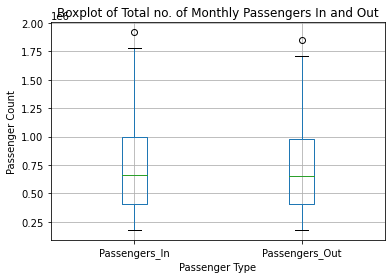

In [317]:
boxplot = sub_AP_mtv.boxplot(column=['Passengers_In','Passengers_Out'])

plt.ylabel('Passenger Count')
plt.xlabel('Passenger Type')
plt.title("Boxplot of Total no. of Monthly Passengers In and Out")

By using the describe() function we can gain information of the number of records in the dataset from count, the standard deviation and the mean of the data which cannot be visualized from the boxplot. While both the describe() function and the boxplot show the first quartile, second, third and max and min values of the dataset. 

The boxplot also display's the outliers of the dataset which cannot be determined directly from the describe() function. The ends of the whiskers (i.e. maximum and minimum score) when there are outliers presented in the data represent the lower and upper boundaries for the data that is considered to be acceptable in range, while the describe() function just displays the maximum and minimum values without considering if those values are outliers or not.

The boxplot allows us to visualize the spread and the skewness of the data which cannot be interpreted straight from the describe function().The above boxplot shows a longer upper whisker which suggest the data are positively skewed and there are more variations for data beyond the 3rd quartile for both passengers in and out. likewise, the boxplot visualization can be used to compare the spread of data between different samples which cannot be done directly from the describe() table, we would need to do further calculations. For instance, the boxplot above we can observe that the spread of passenger_in is slightly more than the passenger_out.


### Part C - Clustering task
Use the dataset ‘ClusteringData.csv’ to cluster the dataset using KMeans. Try different values
of K and visualise your clusters. 



In [318]:
from sklearn.cluster import KMeans

In [319]:
cluster_d = pd.read_csv('ClusteringData.csv')

In [320]:
cluster_d.head()

,GDP per Capita,Suicide Rate
0,1.44178,0.44453
1,1.52733,0.41203
2,1.42666,0.14975
3,1.57744,0.35776
4,1.40598,0.41004


In [321]:
cluster_d.shape

(157, 2)

Text(0.5, 1.0, 'Sucide Rate vs GDP per Capita')

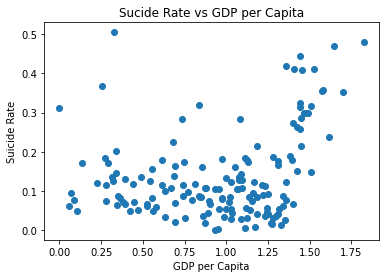

In [332]:
#Visualising the dataset (GDP per Capita vs Sucide Rate)

plt.scatter(x=cluster_d['GDP per Capita'],y=cluster_d['Suicide Rate'])
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.title('Sucide Rate vs GDP per Capita')

In [323]:
# checking for 2 clusters 
kmeans = KMeans(n_clusters=2).fit(cluster_d[['GDP per Capita','Suicide Rate']])

Exploring data with different k vlaues:

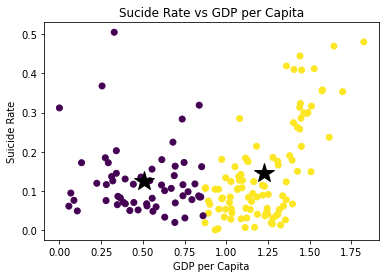

In [337]:
# Visualise the output labels
plt.scatter(x=cluster_d['GDP per Capita'],y=cluster_d['Suicide Rate'], c=kmeans.labels_)

# Visualising the cluster centers using black stars
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.title('Sucide Rate vs GDP per Capita')
plt.show()

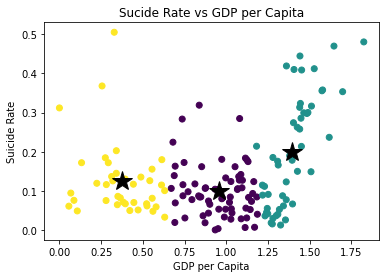

In [336]:
#setting K-Means 3 
kmeans1 = KMeans(n_clusters=3).fit(cluster_d[['GDP per Capita','Suicide Rate']])
plt.scatter(x=cluster_d['GDP per Capita'],y=cluster_d['Suicide Rate'], c=kmeans1.labels_)

# Visualising the cluster centers using black stars
plt.plot(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.title('Sucide Rate vs GDP per Capita')
plt.show()

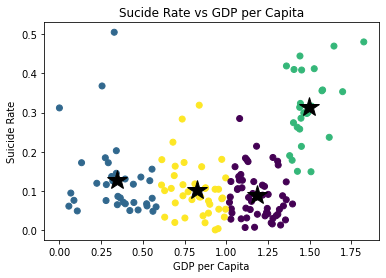

In [335]:
#setting K-Means 4
kmeans2 = KMeans(n_clusters=4).fit(cluster_d[['GDP per Capita','Suicide Rate']])
plt.scatter(x=cluster_d['GDP per Capita'],y=cluster_d['Suicide Rate'], c=kmeans2.labels_)

# Visualising the cluster centers using black stars
plt.plot(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.title('Sucide Rate vs GDP per Capita')
plt.show()

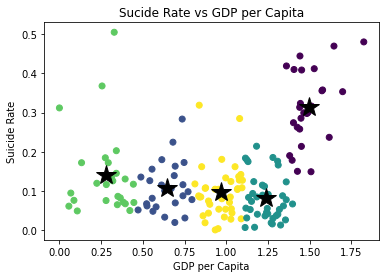

In [334]:
#setting K-Means 5
kmeans3 = KMeans(n_clusters=5).fit(cluster_d[['GDP per Capita','Suicide Rate']])
plt.scatter(x=cluster_d['GDP per Capita'],y=cluster_d['Suicide Rate'], c=kmeans3.labels_)

# Visualising the cluster centers using black stars
plt.plot(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.title('Sucide Rate vs GDP per Capita')
plt.show()

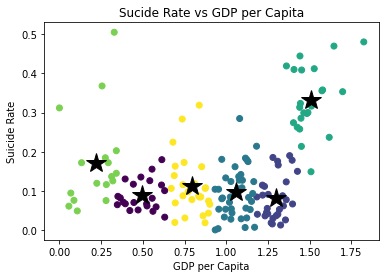

In [333]:
#setting K-Means 6
kmeans4 = KMeans(n_clusters=6).fit(cluster_d[['GDP per Capita','Suicide Rate']])
plt.scatter(x=cluster_d['GDP per Capita'],y=cluster_d['Suicide Rate'], c=kmeans4.labels_)

# Visualising the cluster centers using black stars
plt.plot(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.title('Sucide Rate vs GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

In [329]:
#to view the avg value of GDP 
cluster_d.describe()

,GDP per Capita,Suicide Rate
count,157.000000,157.000000
mean,0.953880,0.137624
std,0.412595,0.111038
min,0.000000,0.000000
25%,0.670240,0.061260
50%,1.027800,0.105470
75%,1.279640,0.175540
max,1.824270,0.505210


#### What is the best value of K based on your visualisation? Why do you think it is the best value for K? Describe the clusters which you see in your visualisation for the best value of K.

After viewing the clusters for different values of K, I found 2 to be the best value of K. For each graph developed we can see that the clusters are being divided horizontally (horizontal spread) according to the GDP per Capita. For more than 2 clusters the criteria by which the clusters are being split isn't explicit/clear. While for 2 clusters, looking at the mean value (i.e. 0.954) of GDP per capita from the above describe function we see that the clusters are split approximately around the average GDP per Capita value. Therefore, we can describe the cluster to the left as suicide rates for lower GDP per capita and the cluster to the right as cluster of suicide rates for higher GDP by considering GDP per capita lesser than average as low GDP per capita and GDP per capita as high GDP per capita. 

We can see that both clusters are pretty spread out. Nonetheless, we see more variations in the rate of suicide for cluster with higher GDP per capita. For low GDP per capita cluster, most of the data points the suicide rate is less than 0.2 and few data points greater than 0.2. The highest datapoint for this cluster has a suicide rate greater than 0.5, which is higher than the highest point in higher GDP per capita cluster.  For higher GDP per capita cluster, we see a gradual increase in the suicide rate as the GDP per capita increases approximately from GDP per capita of 1.25.  
 

### Challenge1:
An important challenge in KMeans is about how to evaluate the quality of clusters. As there is
no dependent variable for clustering models, we cannot check the accuracy or error of our
model and we need other approaches to check the quality of the models. There are many other
metrics/approaches which you can use to evaluate the performance of a clustering model;
Silhouette score is one of them.
#### 1. Explain how the Silhouette score works and what is the meaning of having the following results as a Silhouette score?
https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20value%20is%20a,poorly%20matched%20to%20neighboring%20clusters. 

The silhouette score measures how similar a data is to its  own cluster in comparison to the other clusters. It is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). In order to calculate the silhouette score for each data point we need to measure cohesion and seperation. Cohesion is the "mean distance between the observations and all the other data points in the same cluster" and seperation is the "mean distance between the observation and all other data points of the next nearest cluster". 

It ranges from -1 to +1, where values close to +1 indicate that data matches well to its own cluster and values close to -1 means that the data is assigned to the wrong cluster.

- 1.1. Silhouette Score is 0.02

The Silhouette Score of -0.02 is  is very much close to 0 which suggests that the sample is indifferent or that the sample is very close to the  decision boundary separating two neighboring clusters.
- 1.2. Silhouette Score is -0.06

Likewise, the Silhouette Score of -0.06 is very much close to 0 which suggests that the sample is indifferent or that the sample is very close to the decision boundary separating two neighboring clusters.

- 1.3. Silhouette Score is 0.97

The Silhouette Score of 0.97 is approximately equal to 1 therefore, this indicates that the data matches well with its own cluster and poorly with the neighbouring cluster, therefore it belongs to the cluster.

- 1.4. Silhouette score is -0.9

The Silhouette Score of -0.9 is very close to -1 , therefore this indicates that the data matches poorly with the cluster it is assigned to therefore, doesnt belong to the cluster. 


#### 2. Implement Silhouette score in Sklearn and find out the best number of clusters (K) based on the silhouette score. 

In [330]:
from sklearn.metrics import silhouette_score


https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library
https://stackoverflow.com/questions/59919627/how-to-calculate-the-silhouette-score-for-each-cluster-separately-in-python

In [331]:
#Use silhouette score
#array of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,
                    13,14,15,16,17,18,19,20,
                    21,22,23,24,25,26,27,28,29,30]
print ("Number of clusters from 2 to 20: \n",
       range_n_clusters)
#loop through range_n_clusters and give a silhouette score for each value in the array 
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(cluster_d)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_d, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    

Number of clusters from 2 to 20: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
For n_clusters = 2, silhouette score is 0.5627073439692872)
For n_clusters = 3, silhouette score is 0.48907457426195083)
For n_clusters = 4, silhouette score is 0.4859215570986203)
For n_clusters = 5, silhouette score is 0.45314029528336797)
For n_clusters = 6, silhouette score is 0.4314167501798706)
For n_clusters = 7, silhouette score is 0.434885668315086)
For n_clusters = 8, silhouette score is 0.4169017796725343)
For n_clusters = 9, silhouette score is 0.42647702231346185)
For n_clusters = 10, silhouette score is 0.4106977118946063)
For n_clusters = 11, silhouette score is 0.39179769253944163)
For n_clusters = 12, silhouette score is 0.3831372362295061)
For n_clusters = 13, silhouette score is 0.37211930325175346)
For n_clusters = 14, silhouette score is 0.3838071445185029)
For n_clusters = 15, silhouette score is 0.38588523358005733)
For n

The best number of clustee (K) is 2 with a silhouette score of 0.563. 

### Challenge 2:

#### 1. What is the transformation which you used?

In the above graph by looking at the x and y axis we can say that the transformation used is squaring the variables of the independent and dependent columns. 

#### 2. Do you think your decision to transform the data with that transformation is a good idea? Discuss your answer. 

*When are data transformed ?*

Squaring data of the independent and dependent variables do not reflect the trend in the actual dataset. By doing this transformation we're saying that when there is an increase in the independent variable there is a decrease in the dependent variable. In other words, they are negatively proportional. When it isn't the case. Here, the data seems to be transformed to fit a linear model however, the looking at the original scatter plot we see that the variables do not have a linear relationship as each value in the x-axis has two y values, therefore, I do not think the decision to transform the data with that transformation is a good idea. 
